In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree
from sklearn.tree import plot_tree


In [2]:
#readind dataset
data=pd.read_csv('/home/root1/Downloads/zoo_data.csv')
print(data)

    1  0  0.1  1.1  0.2  0.3  1.2  1.3  1.4  1.5  0.4  0.5  4  0.6  0.7  1.6  \
0   1  0    0    1    0    0    0    1    1    1    0    0  4    1    0    1   
1   0  0    1    0    0    1    1    1    1    0    0    1  0    1    0    0   
2   1  0    0    1    0    0    1    1    1    1    0    0  4    0    0    1   
3   1  0    0    1    0    0    1    1    1    1    0    0  4    1    0    1   
4   1  0    0    1    0    0    0    1    1    1    0    0  4    1    0    1   
.. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ..  ...  ...  ...   
95  1  0    0    1    0    0    0    1    1    1    0    0  2    1    0    1   
96  1  0    1    0    1    0    0    0    0    1    1    0  6    0    0    0   
97  1  0    0    1    0    0    1    1    1    1    0    0  4    1    0    1   
98  0  0    1    0    0    0    0    0    0    1    0    0  0    0    0    0   
99  0  1    1    0    1    0    0    0    1    1    0    0  2    1    0    0   

    1.7  
0     1  
1     4  
2     1  

In [3]:
#adding header
headerList=["hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize","type"]
data.to_csv("zoo_data2.csv",header=headerList,index=False)
dataset=pd.read_csv('zoo_data2.csv')
print(dataset.head())
df=dataset.copy()


   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         0        1         1   
1     0         0     1     0         0        1         1        1         1   
2     1         0     0     1         0        0         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         0        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  type  
0         1         0     0     4     1         0        1     1  
1         0         0     1     0     1         0        0     4  
2         1         0     0     4     0         0        1     1  
3         1         0     0     4     1         0        1     1  
4         1         0     0     4     1         0        1     1  


In [4]:
#splitting dataset into train and test
X=dataset.values[:,0:16]
Y=dataset.values[:,16]
print(X)
print(Y)

[[1 0 0 ... 1 0 1]
 [0 0 1 ... 1 0 0]
 [1 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 1 0 0]]
[1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1 2
 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4 1
 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=100)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(70, 16) (70,) (30, 16) (30,)


In [6]:
model1 = tree.DecisionTreeClassifier(criterion="entropy")
model1 = model1.fit(X_train,y_train)

In [7]:
y_pred_en = model1.predict(X_test)

In [8]:
#Calculating accracy,confusion matrix,classification report
print("Accuracy is :",accuracy_score(y_test,y_pred_en))
print("Confusion matrix is :",confusion_matrix(y_test,y_pred_en))
print("Classification Report :\n",classification_report(y_test,y_pred_en))

Accuracy is : 1.0
Confusion matrix is : [[10  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  5]]
Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



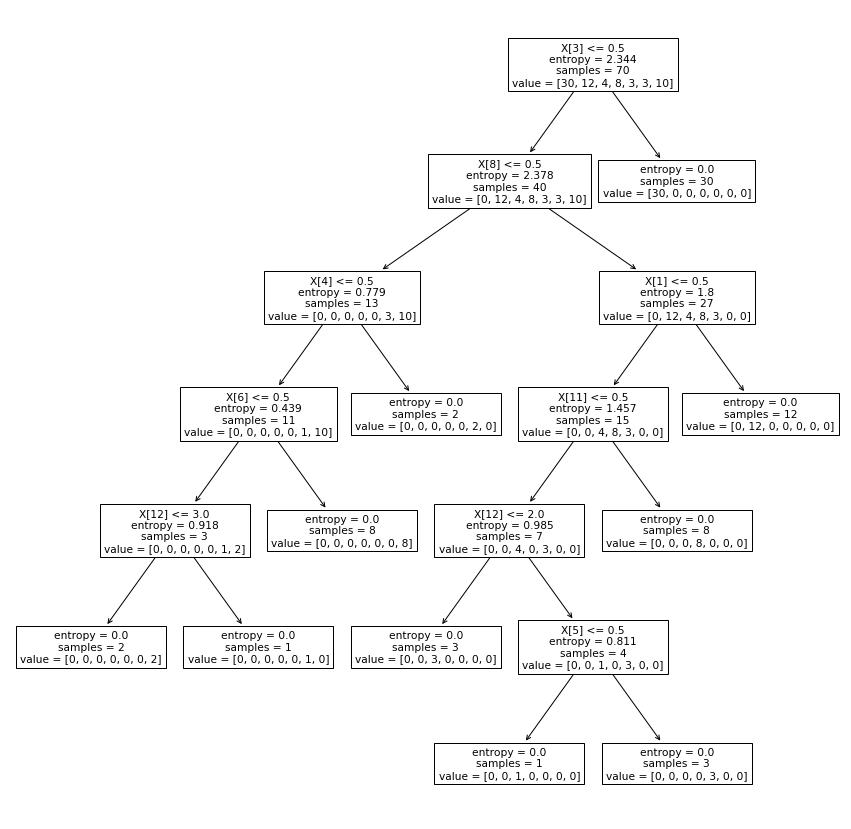

In [9]:
plt.figure(figsize = (15,15))
tree.plot_tree(model1)
plt.show()